## Analyzing dataHitE

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["figure.figsize"] = (20,6) # width, height


In [23]:
!ls

Data Analytics.ipynb  play                  varyHitE_spikes.cpp
Neural Net.ipynb      test.py               varyHitI_2000.txt
Play.ipynb            test.txt              varyHitI_spikes.cpp
dataHitE              test2.txt             varyingHitE
dataHitI              timeSeries.cpp        varyingHitI
dataHitI_smallDrive   varyHitE.cpp          varyingHitIsmallDrive
examples_20000.txt    varyHitE.txt
neural_net.py         varyHitE_large.txt


In [8]:
def get_max_min(filename):
    data_hit = np.loadtxt(filename)
    hits = data_hit[:, 0]
    min_i = np.argmin(hits)
    max_i = np.argmax(hits)
    
    print('min', min_i, hits[min_i])
    print('max', max_i, hits[max_i])
    
    return data_hit, min_i, max_i

In [ ]:
filename_E = './dataHitE/varyHitE_2000.txt'
data_hitE, min_i, max_i = get_max_min(filename_E)
sns.distplot(hit)

In [ ]:
## THIS IS WHAT THE NN SEE
bins_max = data_hitE[max_i, 1:]
bins_min = data_hitE[min_i, 1:]

In [13]:
# plt.figure(figsize = (20, 6)) # width, height
def plot_hist(data_bins, title):
    xs = list(range(200))
    # sum of I and E spikes
    bins_total = data_bins[:200] + data_bins[200:]
    sns.barplot(xs, bins_total, color='red')
    sns.barplot(xs, data_bins[:200], color='blue')
    plt.title(title)

In [ ]:
plot_hist(bins_max, 'Big E Drive')

In [ ]:
plot_hist(bins_min, 'Small E Drive')

min 974 200.657
max 1647 799.753


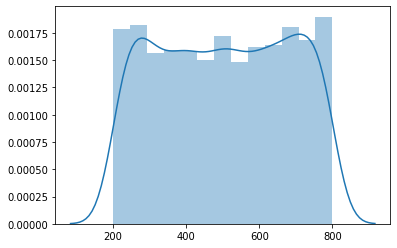

In [9]:
filename_I = './dataHitI/varyHitI_2000.txt'
data_hitI, min_i, max_i = get_max_min(filename_I)
sns.distplot(hit)

In [10]:
## THIS IS WHAT THE NN SEE
bins_max = data_hitI[max_i, 1:]
bins_min = data_hitI[min_i, 1:]

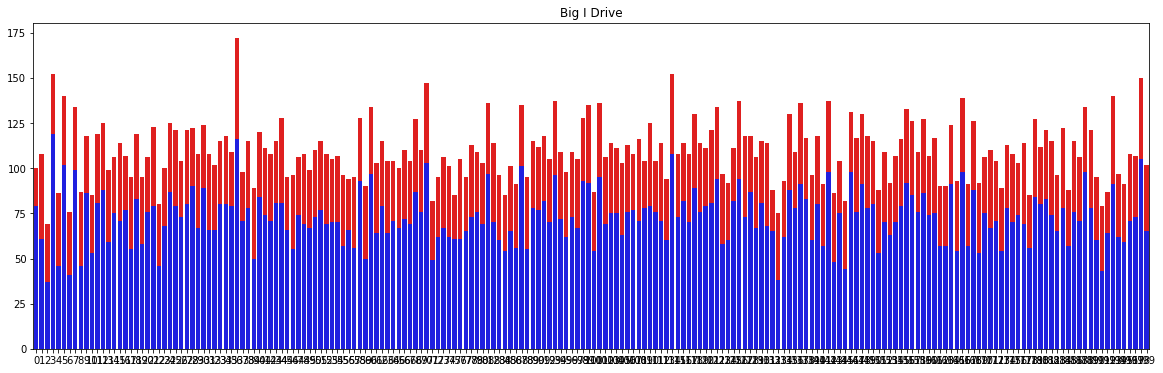

In [17]:
plot_hist(bins_max, 'Big I Drive')

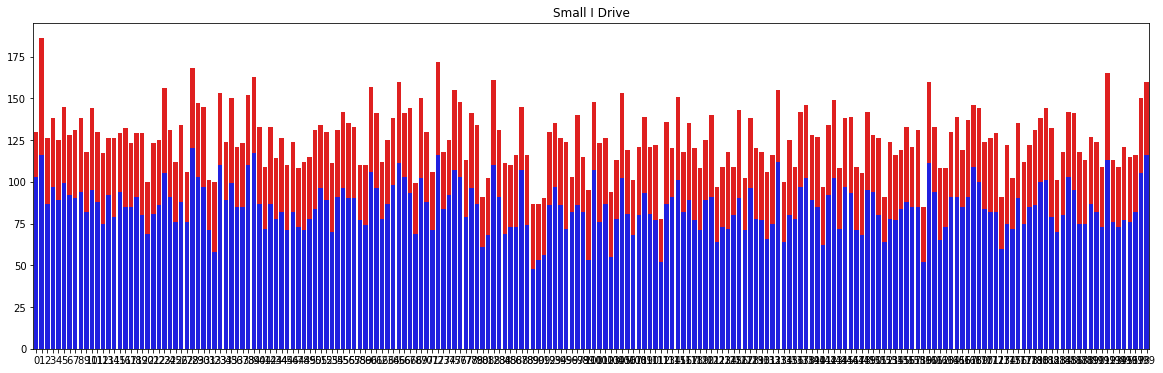

In [18]:
plot_hist(bins_min, 'Small I Drive')

## Spike Pattern

In [19]:
def load_spike_pattern(index, root_pattern):
    file = root_pattern + str(index) + '.txt'
    return np.loadtxt(file)

def visualize_spikes(data):
    neuron_types = np.zeros(len(data))
    neuron_types[np.where(data[:, 1] > 300)] = 1
#     print('data[:, 1]', data[:, 1])
#     print('neuron_types', np.where(data[:, 1] > 300))
    neuron_types = neuron_types.reshape(-1, 1)
    data = np.concatenate((data, neuron_types), axis=1)
    
    
    df = pd.DataFrame(data, columns=["time", "neuron index", "type"])
    
#     print('df', df)
    sns.scatterplot(x="time", y="neuron index", data=df, hue="type", style="type", \
                   s=10)


In [ ]:
## ACTUAL SPIKE PATTERN IN SCATTERPLOTS E
root_pattern = './dataHitE/varyHitE'

spikes_min_data = load_spike_pattern(min_i, root_pattern)
spikes_max_data = load_spike_pattern(max_i, root_pattern)

In [ ]:
plt.rcParams["figure.figsize"] = (20,10) # width, height

visualize_spikes(spikes_min_data)

In [ ]:
plt.rcParams["figure.figsize"] = (20,10) # width, height

visualize_spikes(spikes_max_data)

In [20]:
## ACTUAL SPIKE PATTERN IN SCATTERPLOTS I
root_pattern = './dataHitI/varyHitI'

spikes_min_data = load_spike_pattern(min_i, root_pattern)
spikes_max_data = load_spike_pattern(max_i, root_pattern)

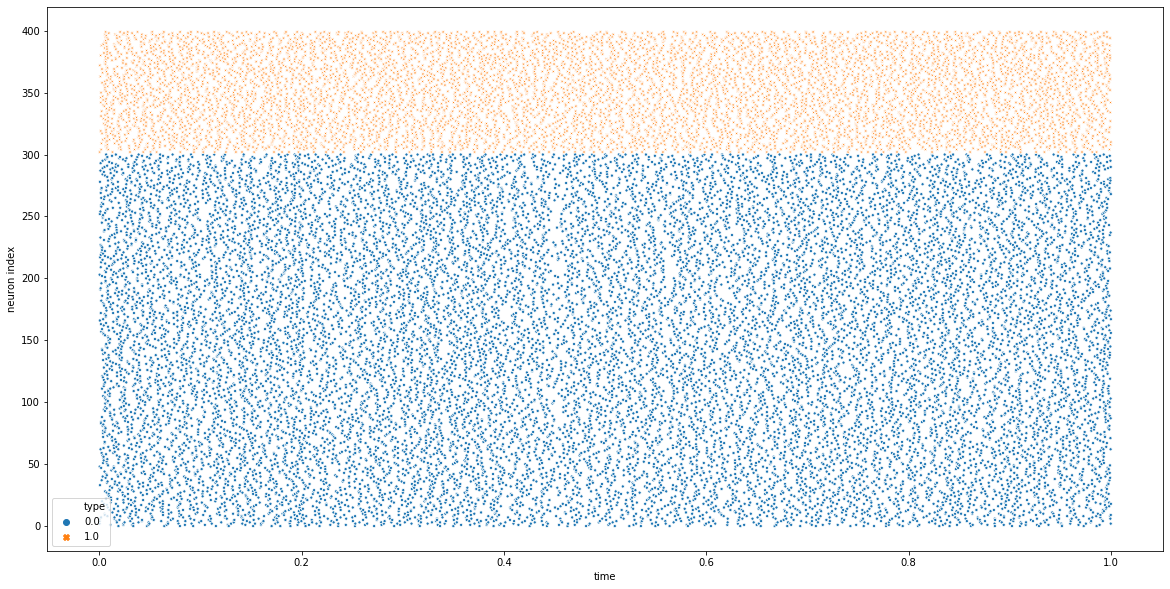

In [21]:
plt.rcParams["figure.figsize"] = (20,10) # width, height

visualize_spikes(spikes_min_data)

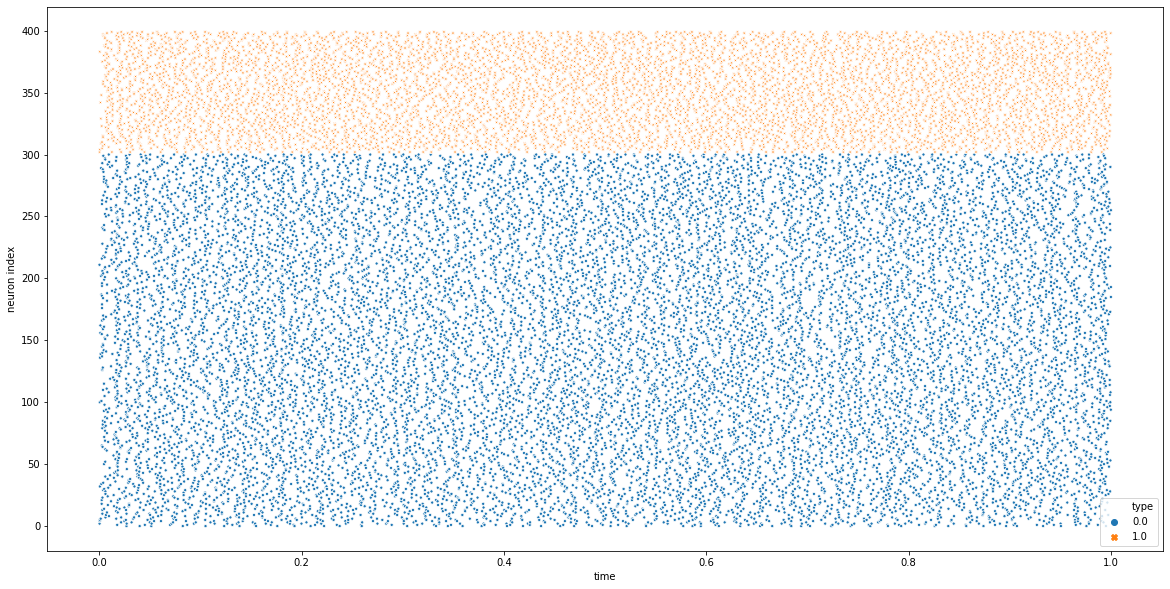

In [22]:
plt.rcParams["figure.figsize"] = (20,10) # width, height

visualize_spikes(spikes_max_data)